In [20]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.stack = nn.Sequential(
            nn.Linear(1, 20),
            nn.Tanh(),
            nn.Linear(20, 20),
            nn.Tanh(),
            nn.Linear(20, 20),
            nn.Tanh(),
            nn.Linear(20, 20),
            nn.Tanh(),            
            nn.Linear(20, 20),
            nn.Tanh(),            
            nn.Linear(20, 20),
            nn.Tanh(),            
            nn.Linear(20, 20),
            nn.Tanh(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.stack(x)



def ode_loss(input, output):
    assert(input.shape == output.shape)
    dy = [torch.autograd.grad(out, input, retain_graph=True)[0][i][0] 
    for i, out in enumerate(output)]
    dy = torch.stack(dy)
    A = torch.linalg.norm(dy+2*input*output, ord=2)
    return A
def bound_loss(input, output):
    return (input-1)**2

Using cuda device


In [35]:
N = 100
X = torch.linspace(0, 10, N, requires_grad=True).reshape(N, 1)
model = NN()
optimizer = torch.optim.Adam(model.parameters(), lr=.001)

for e in range(0, 800):
    optimizer.zero_grad()
    output = model(X)
    loss1 = ode_loss(X, output)
    output = model(torch.Tensor([0]))
    loss2 = bound_loss(output, torch.Tensor([0]))
    loss = loss1 + 20*loss2
    loss.backward()
    optimizer.step()
    if e % 50 == 0:
        print(e, loss1.item(), loss2.item(), loss.item())

0 156.6414031982422 0.779477596282959 172.23095703125
50 0.2670784294605255 0.989352822303772 20.054134368896484
100 0.844959557056427 0.9808109402656555 20.461177825927734
150 0.6920511722564697 0.9760192036628723 20.212434768676758
200 0.9944251775741577 0.9647908806800842 20.29024314880371
250 1.065826177597046 0.9532004594802856 20.12983512878418
300 1.7030237913131714 0.9285635352134705 20.274293899536133
350 1.2235562801361084 0.8913195729255676 19.04994773864746
400 2.440830707550049 0.8053585886955261 18.548002243041992
450 4.768689155578613 0.6480932235717773 17.730552673339844
500 9.758914947509766 0.4255584478378296 18.270084381103516
550 13.683533668518066 0.21903063356876373 18.064146041870117
600 18.520263671875 0.09295753389596939 20.379413604736328
650 22.752931594848633 0.035191506147384644 23.456762313842773
700 23.63161277770996 0.012975804507732391 23.891128540039062
750 25.102081298828125 0.004818968009203672 25.198461532592773


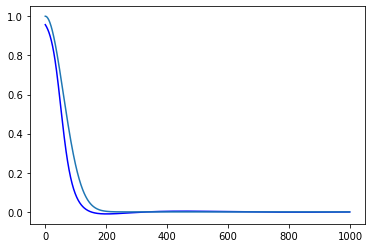

In [36]:
x = np.linspace(0, 12, 1000)
X_test = torch.linspace(0, 12, 1000).reshape(1000, 1)
plt.plot(model(X_test).detach(), color='b')
plt.plot(np.exp(-x**2))
